# Vetorized gradient descent (Linear Regression)

### 1. 가중치가 여러개로 이루어진 식을 Gradient descent로 업데이트 해봅시다

In [ ]:
# 단순 선형 회귀를 위한 임의의 데이터셋을 생성합니다.
seed = 1215
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=2000, n_features=5, random_state=seed, n_informative = 5, noise = 3.0)

X_train = X[:1600]
X_test = X[1600:]
y_train = y[:1600]
y_test = y[1600:]

### 1-1. 다음과 같은 산점도를 그려보세요

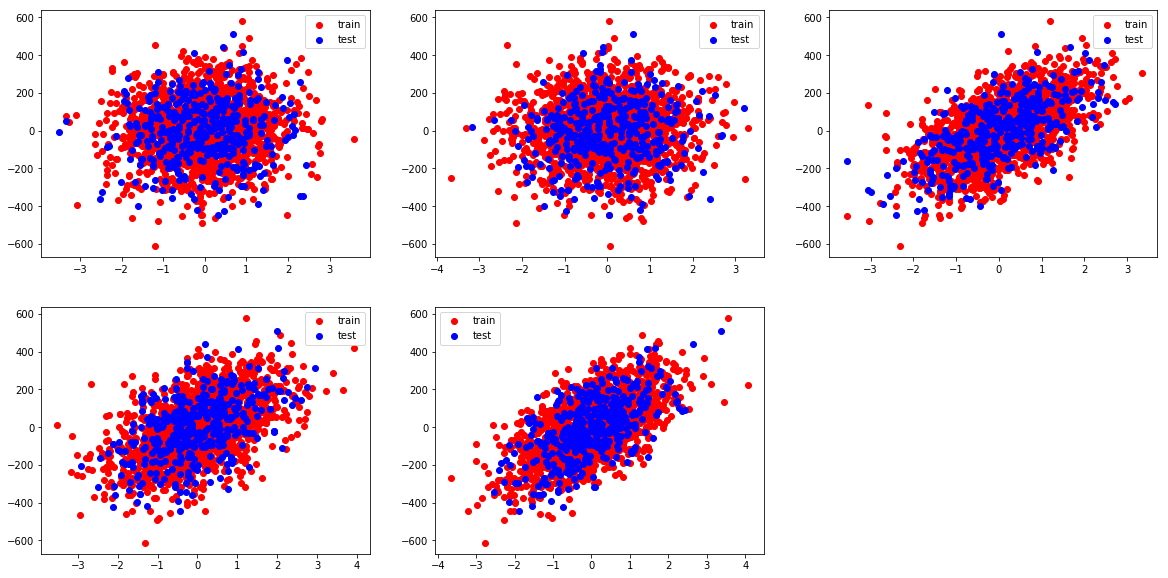

In [3]:
import matplotlib.pyplot as plt

# Your Code Here
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.scatter(X_train[:,0],y_train, c="r")
plt.scatter(X_test[:,0],y_test, c="b")
plt.legend(["train", "test"])

plt.subplot(2,3,2)
plt.scatter(X_train[:,1],y_train, c="r")
plt.scatter(X_test[:,1],y_test, c="b")
plt.legend(["train", "test"])

plt.subplot(2,3,3)
plt.scatter(X_train[:,2],y_train, c="r")
plt.scatter(X_test[:,2],y_test, c="b")
plt.legend(["train", "test"])

plt.subplot(2,3,4)
plt.scatter(X_train[:,3],y_train, c="r")
plt.scatter(X_test[:,3],y_test, c="b")
plt.legend(["train", "test"])

plt.subplot(2,3,5)
plt.scatter(X_train[:,4],y_train, c="r")
plt.scatter(X_test[:,4],y_test, c="b")
plt.legend(["train", "test"])

plt.show()

### 1-2. h(x) = ax1+bx2+cx3+dx4+ex5라는 식을 만들어 Gradient Descent를 이용해 mse를 최소화하는 a를 찾아보세요

In [6]:
import numpy as np
def h(theta,X):
    return np.dot(X,theta)

In [32]:
# Version 1 (for문으로 짜기)
iterations = 100000
learningrate = 0.001
y_test = y_test.reshape(400,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********
        
        error = np.zeros(5)
        # for문 없이 벡터로 짤 수도 있습니다
        for i in range(len(theta)):
            error[i] = (1/len(X))*np.sum((h(theta,X)-y)*X[:,i])
        
        for i in range(len(theta)):
            theta[i] = theta[i] - learningrate*error[i]
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [33]:
from datetime import datetime
start = datetime.now()
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))
print(datetime.now()-start)

Optimal "a" is: [12.00676592  4.97269009 95.9860066  77.67241642 99.76260561] 
 R^2 : 0.9996242155640246
0:00:17.961645


In [30]:
# Version 2 (vector로 짜기)
iterations = 100000
learningrate = 0.001
y_test = y_test.reshape(400,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********
        
        error = np.zeros(5)
        error = (1/len(X))*np.sum((h(theta,X)-y).reshape(-1,1)*X,axis=0)
        theta = theta - learningrate*error
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [31]:
# 10만번 기준으로 약 2초정도 빠릅니다 
# for문으로 짜면 쉽지만 속도가 느려지는 단점이 있습니다
# 따라서, for문으로 먼저 짜고 벡터표현으로 짤 수 있는 방법을 고민해보세요 :)
from datetime import datetime
start = datetime.now()
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))
print(datetime.now()-start)

Optimal "a" is: [12.00676592  4.97269009 95.9860066  77.67241642 99.76260561] 
 R^2 : 0.9996242155640246
0:00:15.940150


### 1.3 잘 찾았는지 Linear Regression의 coefficient와 비교해봅시다

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# optimal a,b based on OLS
print("y = %.4fX1 + %.4fX2 + %.4fX3 + %.4fX4 + %.4fX5 + %.4f"%
      (float(model.coef_[0]),float(model.coef_[1]), float(model.coef_[2]), float(model.coef_[3]), 
       float(model.coef_[4]),float(model.intercept_)))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# r2_score
r_square = r2_score(y_test, y_pred)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

# OLS 방식으로 찾아낸 coefficient값과 매우 유사합니다
# 우리가 찾은 모델의 R^2 값이 0.0000005 정도 높습니다

y = 12.0081X1 + 4.9736X2 + 95.9852X3 + 77.6710X4 + 99.7633X5 + 0.0374
Mean Squared Error : 10.095756191029531
R^2 : 0.9996237342985043


### 1.4 test set에서 왜 오차 제곱합을 최소화하는 선형식보다 gradient descent로 찾은 선형식이 설명력이 높을까요? 그 이유를 설명해주세요

In [198]:
# Your Answer Here
# 이번 경우에는 OLS 기반의 solution이 과적합된 것으로 보입니다. training set에서의 loss는 더 낮지만 test set에서의 loss가 더 높습니다.
# 조금 더 생각해보면 gradient descent 방식은 learning rate가 아주아주 작지 않으면 OLS와 같은 값을 갖지 않습니다.
# global optima 근처에서부터 weight update는 더 이상 좋은 solution을 제공하지 않고 근처를 널뛰기 합니다. 
# 따라서, 일종의 noise로 작용해 과적합이 덜 된 선형식을 찾았다고 볼 수 있습니다.

### 1.5 위 경우가 항상 가능한가요?(True/False) 를 고르고 그 이유를 설명해주세요

In [199]:
# Your Answer Here
# False입니다. training set에서의 OLS solution이 test set에서도 gradient descent 방식보다 더 좋을 수 있습니다.
# training set loss function의 최저점을 주는 solution이 더 일반적인 solution일 수 있습니다.
# 일반적으로 training set이 전체의 모집단을 잘 반영하고 example이 매우 많은 경우에 이런 경우가 쉽게 발생합니다.
# gradient descent는 여전히 global optima 근처에서의 널뛰기로 인해 최저점 근처를 맴돌게 됩니다.

### 2. Linear Regression with L1 regularization

![img](https://i2.wp.com/laid.delanover.com/wp-content/uploads/2018/01/reg_formulas.png?w=550)

In [8]:
# 기존의 Loss는 다음과 같습니다
def MSE(mytheta,X,y):
    return float((1./(len(X)*2)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

### 2-1. L1 reg term을 추가한 MSE 함수를 작성해보세요

In [9]:
def MSE(mytheta,X,y,lambdaa):
    return float((1./(len(X)*2)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y))) + lambdaa*np.sum(abs(mytheta))

### 2-2. 1-2에서 작성한 Gradientdescent 함수를 이용해 L1 reg term이 추가된 함수를 작성해봅시다

In [10]:
iterations = 10000
learningrate = 0.001
lambdaa = 0.01
y_test = y_test.reshape(400,1)

# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********
        # 한줄로 짜도 되고 4줄로 짜도 됩니다 뭐가 깔끔한지는 잘 모르겠네요 !
        error = np.zeros(5)
        
        # 1줄 버전
        #for i in len(theta):
        #    error[i] = = (1/len(X)*2)*np.sum((h(theta,X)-y)*X[:,i]) + 1 if (theta[i] > 0:) else error[i] = (1/len(X)*2)*np.sum((h(theta,X)-y)*X[:,i]) - 1
        
        for i in range(len(theta)):
            if theta[i] > 0:
                error[i] = (1/len(X))*np.sum((h(theta,X)-y)*X[:,i]) + lambdaa * 1 
            else:
                error[i] = (1/len(X))*np.sum((h(theta,X)-y)*X[:,i]) - lambdaa * 1
        
        theta = theta - learningrate*error
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [11]:
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))

Optimal "a" is: [11.99614073  4.96390685 95.97015651 77.66348898 99.74888465] 
 R^2 : 0.9996240021593519


### 2-3. 이번에는 L2 reg term이 추가된 함수를 작성해봅시다

In [42]:
iterations = 10000
learningrate = 0.001
lambdaa = 0.01
y_test = y_test.reshape(400,1)


# 초기값(theta_start)은 자유입니다
def Gradientdescent(X, y, theta_start):
    theta = theta_start
    
    for meaningless in range(iterations):
        # Your Code Here 
        # ********** 각 theta의 업데이트는 동시에 이루어져야 합니다 **********

        error = np.zeros(5)
        error = (1/len(X))*np.sum((h(theta,X)-y).reshape(-1,1)*X,axis=0) + 2*lambdaa*theta
        theta = theta - learningrate*error
        
    y_pred = h(theta,X_test)
    r_square = r2_score(y_test, y_pred)    
    
    return print('Optimal "a" is:', theta, '\n', 'R^2 :', r_square)

In [39]:
Gradientdescent(X_train,y_train, np.array([0.01,0.01,0.01,0.01,0.01]))

Optimal "a" is: [11.78067844  4.89836603 94.05967499 76.32823117 97.85307833] 
 R^2 : 0.9992212245093108


### 2-4. L1과 L2 regularization의 차이점을 gradient를 이용해 설명해보세요 왜 L1은 feature selection이 가능하고 L2는 그렇지 않은 걸까요?

In [ ]:
# Your Answer Here
# 답이 너무 길어서 블로그에 글을 작성했습니다 참고하세요 :)
# https://shwksl101.github.io/python/2019/01/27/L1_L2_regularization.html

### 3. Hyperparameter Search - Grid Search vs Random Search

In [14]:
import sklearn.datasets
seed = 1215
X, y = sklearn.datasets.make_classification(n_samples=3000, n_features=10, n_classes=3, n_informative = 7, random_state = seed)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 전체 data set을 (training + validation), test으로 나눔
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=seed)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=seed)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

size of training set: 1687,  size of validation set: 563,  size of test set: 750


### 3.1 grid search를 이용해 최적의 gamma와 C를 찾아봅시다 여기서 gamma와 C는 hyperparameter입니다.

In [16]:
# sklearn.svm.SVC의 argument에 대한 정보는 다음의 링크에서 찾아보세요
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# 기본적인 절차는 다음과 같습니다
# 우선 아주 큰 범위에서 gamma와 C의 조합을 탐색합니다 (ex.0.001~100)
# 특정 범위(ex.0.01~0.1)에서 best score를 달성할 경우 해당 범위에서 다시 grid search를 수행합니다.
# 이를 반복하며 best hyperparameter를 탐색합니다
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)       

최고 점수(모델 정확도): 0.9182948490230906
최적 매개변수: {'C': 100, 'gamma': 0.01}


### 3.2 ransom search를 이용해 최적의 gamma,C를 찾아봅시다

In [17]:
best_score = 0

for gamma in np.random.uniform(0.001,100,5):
    for C in np.random.uniform(0.001,100,5):
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)       

최고 점수(모델 정확도): 0.33570159857904086
최적 매개변수: {'C': 19.706235680616146, 'gamma': 5.312542180154457}


In [18]:
# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가 
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("validation set에서 최고 점수: ", best_score)
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 test set의 점수(모델 정확도): ", test_score)

validation set에서 최고 점수:  0.33570159857904086
최적 매개변수:  {'C': 19.706235680616146, 'gamma': 5.312542180154457}
최적 매개변수에서 test set의 점수(모델 정확도):  0.3426666666666667


### 3.3 100번의 탐색 기회를 이용해 Grid Search와 Random Search를 각각 수행해보고 최적의 hyperparameter 조합을 찾아보세요 !

In [19]:
# 일반적으로 넓은 범위에서 탐색하고 좋은 결과를 낸 범위에서 다시 search를 진행하는 것을 반복하는 식으로 합니다. 
# random search, grid search 모두 동일합니다. 저는 같은 결과가 나왔지만 다른 결과가 나올 수도 있습니다. 

# random search
best_score = 0

for gamma in np.random.uniform(0.001,0.01,10):
    for C in np.random.uniform(50,200,10):
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)    

최고 점수(모델 정확도): 0.9200710479573713
최적 매개변수: {'C': 146.27195805127405, 'gamma': 0.009646267610260294}


In [20]:
best_score = 0

for gamma in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]:
    for C in [50, 70, 90, 110, 130, 150, 170, 190, 200]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)

최고 점수(모델 정확도): 0.9200710479573713
최적 매개변수: {'C': 170, 'gamma': 0.009}


### 3.4 다음의 그림을 참고하여 어떤 parameter search 방법이 더 좋은 것인지 설명해주세요

![img](https://i.stack.imgur.com/cIDuR.png)

In [ ]:
# Your Answer Here
# 답이 너무 길어서 블로그에 글을 작성했습니다 참고하세요 :)
# https://shwksl101.github.io/python/2019/01/30/Hyper_parameter_optimization.html

# 고생하셨습니다 :)